<a href="https://colab.research.google.com/github/HodaMemar/A3/blob/main/Multi_Label_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**machinelearningmastery**

https://machinelearningmastery.com/multi-label-classification-with-deep-learning/

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from numpy import asarray


In [ ]:
def get_dataset():
	X, y = make_multilabel_classification(n_samples=1000, n_features=10, n_classes=3, n_labels=2, random_state=1)
	return X, y

In [ ]:
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [ ]:
def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		# define model
		model = get_model(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=100)
		# make a prediction on the test set
		yhat = model.predict(X_test)
		# round probabilities to class labels
		yhat = yhat.round()
		# calculate accuracy
		acc = accuracy_score(y_test, yhat)
		# store result
		print('>%.3f' % acc)
		results.append(acc)
	return results

In [ ]:
X, y = get_dataset()
# evaluate model
results = evaluate_model(X, y)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

>0.860
>0.860
>0.870
>0.810
>0.830
>0.820
>0.780
>0.790
>0.770
>0.730


KeyboardInterrupt: ignored

In [ ]:
X

array([[ 3.,  3.,  6., ..., 11.,  1.,  3.],
       [ 7.,  6.,  4., ...,  4.,  6.,  4.],
       [ 5.,  5., 13., ..., 11.,  4.,  2.],
       ...,
       [ 4.,  3.,  6., ..., 11.,  1.,  3.],
       [ 2.,  4., 12., ...,  8.,  1.,  2.],
       [ 3.,  3.,  3., ...,  3.,  3.,  5.]])

In [ ]:
y

array([[1, 1, 0],
       [0, 0, 0],
       [1, 1, 0],
       ...,
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 1]])

In [ ]:
# load dataset
X, y = get_dataset()
n_inputs, n_outputs = X.shape[1], y.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X, y, verbose=0, epochs=100)
# make a prediction for new data
row = [3, 3, 6, 7, 8, 2, 11, 11, 1, 3]
newX = asarray([row])
yhat = model.predict(newX)
print('Predicted: %s' % yhat[0])

Predicted: [0.9977638  0.98400617 0.00315556]



**towardsdatascience**

https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff

In [ ]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/PaperA3/Multilabel/train.txt"
data_raw = pd.read_csv(data_path)
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
print("**Sample data:**")
data_raw.head()

Number of rows in data = 159571
Number of columns in data = 8


**Sample data:**


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Count the number of comments under each label

In [ ]:
data_raw.iloc[:,2:].sum().values


array([15294,  1595,  8449,   478,  7877,  1405])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


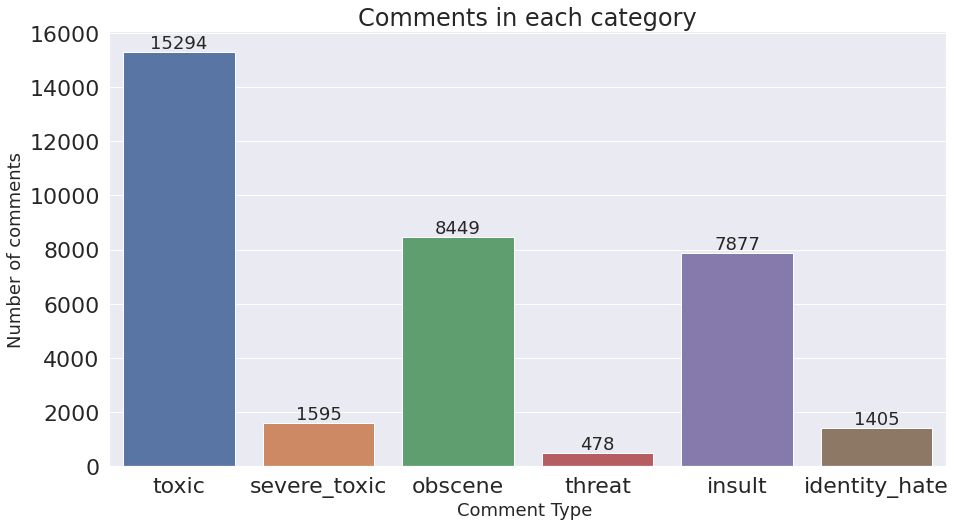

In [ ]:
#categories = list(data_raw.columns.values)
categories=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)
plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

Counting the number of comments having multiple labels

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


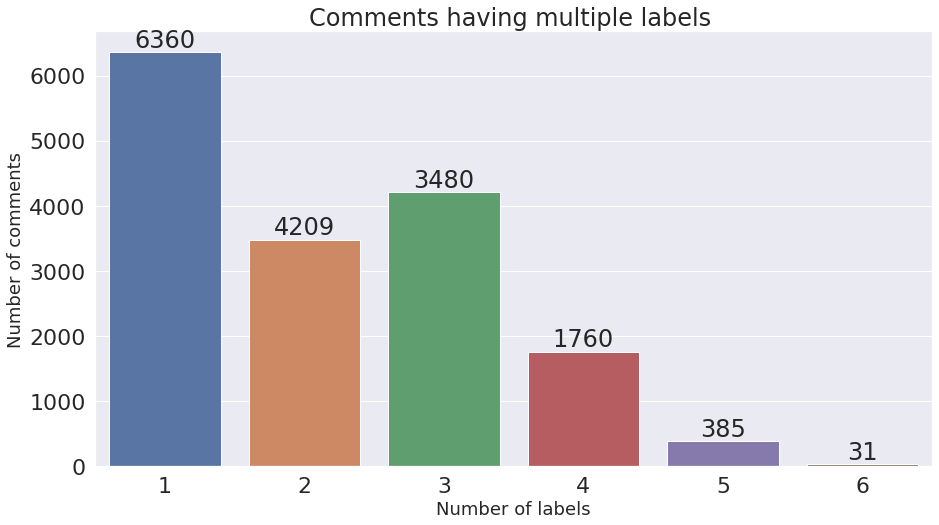

In [ ]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

WordCloud representation of most used words in each category of comments

In [ ]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(40,25))
# clean
subset = data_raw[data_raw.severe_toxic==True]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)
# Same code can be used to generate wordclouds of other categories.

KeyboardInterrupt: ignored

<Figure size 2880x1800 with 0 Axes>

Data Pre-Processing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
data = data_raw
if not sys.warnoptions:
    warnings.simplefilter("ignore")
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)

remove all the stop-words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
data['comment_text'] = data['comment_text'].apply(removeStopWords)

In [ ]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore m...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww matches background colour im seemingly ...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy c...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestions improvement ...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats on,0,0,0,0,0,0


Stemming

In [ ]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
data['comment_text'] = data['comment_text'].apply(stemming)

In [ ]:
data.to_csv('/content/drive/MyDrive/PaperA3/Multilabel/data.csv')

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['comment_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 136407 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(data['comment_text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (159571, 250)


In [ ]:
Y = data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (159571, 6)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(143613, 250) (143613, 6)
(15958, 250) (15958, 6)


In [ ]:
print(X_train.shape,Y_train.shape)

(143613, 250) (143613, 6)


LSTM 

---
https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17


In [ ]:
from keras.layers.core import Dense, SpatialDropout1D
from keras.layers.convolutional import Conv1D
from keras.layers.embeddings import Embedding
from keras.layers.pooling import GlobalMaxPooling1D
from keras.models import Sequential
from keras.layers import Flatten, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])




In [ ]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 250, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                                 
 dense_7 (Dense)             (None, 6)                 606       
                                                                 
Total params: 5,081,006
Trainable params: 5,081,006
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 2
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/2
2020/2020 [==============================] - 1378s 680ms/step - loss: 0.3574 - categorical_accuracy: 0.9887 - val_loss: 0.3762 - val_categorical_accuracy: 0.9416
Epoch 2/2
2020/2020 [==============================] - 1354s 670ms/step - loss: 0.3470 - categorical_accuracy: 0.9384 - val_loss: 0.3486 - val_categorical_accuracy: 0.9170


In [78]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  categorical_accuracy: {:0.3f}'.format(accr[0],accr[1]))

499/499 [==============================] - 33s 66ms/step - loss: 0.0991 - auc_2: 0.8906
Test set
  Loss: 0.099
  categorical_accuracy: 0.891


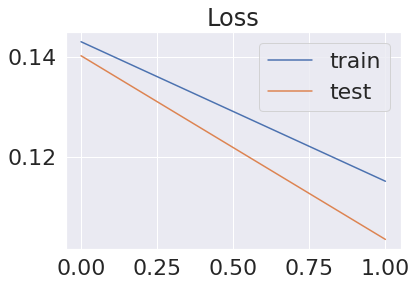

In [79]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [81]:
history.history

{'auc_2': [0.7581061720848083, 0.8562031984329224],
 'loss': [0.1430683583021164, 0.11504806578159332],
 'val_auc_2': [0.7880215644836426, 0.8889846205711365],
 'val_loss': [0.14025385677814484, 0.10336620360612869]}

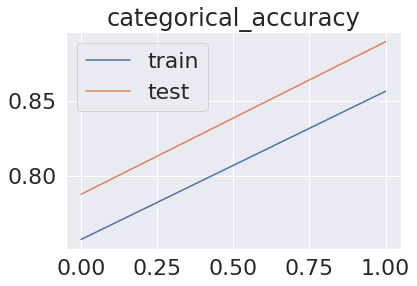

In [82]:
plt.title('categorical_accuracy')
plt.plot(history.history['auc_2'], label='train')
plt.plot(history.history['val_auc_2'], label='test')
plt.legend()
plt.show();

Test with a New Complaint

In [76]:
new_complaint = ['I am a victim of identity theft and someone stole my identity and personal information to open up a Visa credit card account with Bank of America. The following Bank of America Visa credit card account do not belong to me : XXXX.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['Credit reporting, credit repair services, or other personal consumer reports', 'Debt collection', 'Mortgage', 'Credit card or prepaid card', 'Student loan', 'Bank account or service', 'Checking or savings account', 'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Vehicle loan or lease', 'Money transfer, virtual currency, or money service', 'Money transfers', 'Prepaid card']
print(pred, labels[np.argmax(pred)])

[[0.05599341 0.00183025 0.01586601 0.00116855 0.02154073 0.0032011 ]] Credit reporting, credit repair services, or other personal consumer reports


DNN with WordEmbedding

---

https://medium.com/swlh/multi-label-text-classification-with-scikit-learn-and-tensorflow-257f9ee30536

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPool1D
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(GlobalMaxPool1D())
model.add(Dense(6, activation='sigmoid'))
model.compile(optimizer=Adam(0.015), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 250, 100)          5000000   
                                                                 
 global_max_pooling1d_1 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_10 (Dense)            (None, 6)                 606       
                                                                 
Total params: 5,000,606
Trainable params: 5,000,606
Non-trainable params: 0
_________________________________________________________________
None


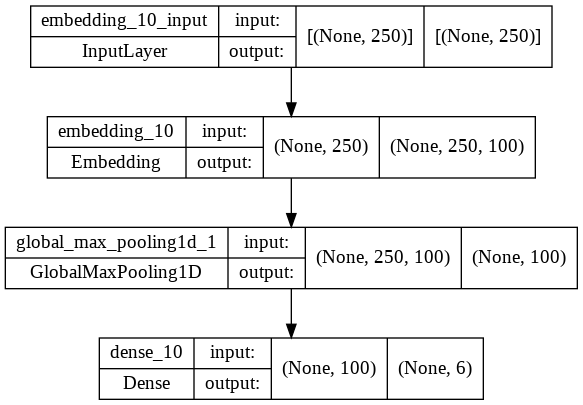

In [ ]:
from keras.utils.vis_utils import plot_model
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
epochs = 2
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/2
2020/2020 [==============================] - 124s 61ms/step - loss: 0.0615 - auc: 0.9679 - val_loss: 0.0549 - val_auc: 0.9749
Epoch 2/2
2020/2020 [==============================] - 117s 58ms/step - loss: 0.0461 - auc: 0.9819 - val_loss: 0.0627 - val_auc: 0.9686


 LSTM with GloVe WordEmbedding

---

https://medium.com/swlh/multi-label-text-classification-with-scikit-learn-and-tensorflow-257f9ee30536

In [ ]:
from keras.models import Model
from keras.layers import Input
deep_inputs = Input(shape=(X.shape[1],))
embedding_layer = Embedding(MAX_NB_WORDS, 100, trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(6, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.AUC()])

In [69]:
epochs = 2
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs,
                    batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/2
2020/2020 [==============================] - 938s 440ms/step - loss: 0.1431 - auc_2: 0.7581 - val_loss: 0.1403 - val_auc_2: 0.7880
Epoch 2/2
2020/2020 [==============================] - 880s 436ms/step - loss: 0.1150 - auc_2: 0.8562 - val_loss: 0.1034 - val_auc_2: 0.8890


In [72]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  categorical_accuracy: {:0.3f}'.format(accr[0],accr[1]))

499/499 [==============================] - 33s 66ms/step - loss: 0.0991 - auc_2: 0.8906
Test set
  Loss: 0.099
  categorical_accuracy: 0.891


In [74]:
history.history

{'auc_2': [0.7581061720848083, 0.8562031984329224],
 'loss': [0.1430683583021164, 0.11504806578159332],
 'val_auc_2': [0.7880215644836426, 0.8889846205711365],
 'val_loss': [0.14025385677814484, 0.10336620360612869]}

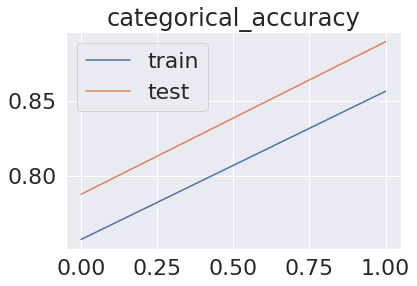

In [75]:
plt.title('categorical_accuracy')
plt.plot(history.history['auc_2'], label='train')
plt.plot(history.history['val_auc_2'], label='test')
plt.legend()
plt.show();